In [57]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import json
from utils.coco_utils.coco_utils import eval_coco
from collections import defaultdict
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import sys
import os



In [58]:
class SilentOutput:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout
        
def generate_pr_curves_over_conf(val_coco, pred_coco, iou_thresh=0.45, conf_thresholds=np.arange(0.05, 1.0, 0.05)):
    pr_curves = defaultdict(lambda: {'precision': [], 'recall': [], 'conf_thresh': []})
    
    for conf_thresh in tqdm(conf_thresholds):
        # Get precision and recall at the current confidence threshold
        with SilentOutput():
            precision_recall = eval_coco(val_coco, pred_coco, iou_thresh=iou_thresh, conf_thresh=conf_thresh)
        
        for cat_id, pr in precision_recall.items():
            
            pr_curves[cat_id]['conf_thresh'].append(conf_thresh)
            if conf_thresh == 0:
                pr_curves[cat_id]['precision'].append(0.0)
                pr_curves[cat_id]['recall'].append(1.0)
            else:
                pr_curves[cat_id]['precision'].append(pr['Precision'])
                pr_curves[cat_id]['recall'].append(pr['Recall'])

    
    return pr_curves

def plot_pr_curves(pr_curves, category_names,out_dir='', show=True):
    for cat_id, pr in pr_curves.items():
        plt.figure()
        
        # Extract data
        recalls = pr['recall']
        precisions = pr['precision']
        conf_thresholds = pr['conf_thresh']
        
        # Plot PR curve
        plt.plot(recalls, precisions, marker='o', linestyle='-', color='b')
        
        # Add labels for each point
        for i, conf_thresh in enumerate(conf_thresholds):
            plt.annotate(f'{conf_thresh:.2f}', (recalls[i], precisions[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

        # Add title and labels
        plt.title(f'Precision-Recall Curve for Category {category_names[cat_id]}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.grid(True)
        if out_dir != '':
            plt.savefig(f'{out_dir}/PR-{category_names[cat_id]}.png')
        if show: plt.show()

def plot_all_curves(pr_curves, category_names,out_dir='', show=True):
    plt.figure(figsize=(12, 8))  # Set the figure size
    
    # Define a color map to differentiate curves
    colors = plt.cm.get_cmap('tab10', len(pr_curves))  # 'tab10' colormap with a distinct color for each category

    for cat_id, pr in pr_curves.items():
        # Extract data
        recalls = pr['recall']
        precisions = pr['precision']
        conf_thresholds = pr['conf_thresh']

        # Plot PR curve with a unique color for each category
        plt.plot(recalls, precisions, marker='o', linestyle='-', color=colors(cat_id), label=f'{category_names[cat_id]}')

        # Optionally, add labels for each point
        for i, conf_thresh in enumerate(conf_thresholds):
            plt.annotate(f'{conf_thresh:.2f}', (recalls[i], precisions[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color=colors(cat_id))

    # Add title and labels
    plt.title('Precision-Recall Curves for All Categories')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()  # Show the legend with category names
    plt.grid(True)
    if out_dir != '':
        plt.savefig(f'{out_dir}/PR-all.png')
    if show: plt.show()

In [59]:
dataset_dir = 'E:/datasets'
dataset_name = 'DOTA_dataset_512'
coco_dir = f'{dataset_dir}/{dataset_name}'
val_coco = f'{coco_dir}/val_coco.json'
#val_coco = f'{coco_dir}/plane_ship_aug_val_coco.json'

# Load the ground truth COCO annotations
cocoGt = COCO(val_coco)

loading annotations into memory...
Done (t=0.72s)
creating index...
index created!


In [60]:
with open(val_coco,'r') as f:
    coco_json = json.load(f)

category_map = {cat['id']:cat['name'] for cat in coco_json['categories']}
categories = list(category_map.keys())

In [61]:
for key, val in category_map.items():
    print(f'{key}:{val}')

1:small-vehicle
2:large-vehicle
3:ship
4:harbor
5:baseball-diamond
6:soccer-ball-field
7:ground-track-field
8:swimming-pool
9:roundabout
10:tennis-court
11:basketball-court
12:plane
13:helicopter
14:bridge
15:storage-tank
16:container-crane


In [62]:
cocoDts = []
#names = ['base','blur','rotation','drop_pixel']
#out_dirs =[ f'{coco_dir}{res_dir}' for res_dir in ['','/blur','/rotation','/drop_pixel']]
#res_file_paths =[ f'{coco_dir}{res_dir}/YOLO_coco_results_list.json' for res_dir in ['','/blur','/rotation','/drop_pixel']]
#names = ['plane_ship_aug_results']
#result_dirs = ['/plane_ship_aug_results']
names = ['base']
result_dirs = ['']
out_dirs =[ f'{coco_dir}{res_dir}' for res_dir in result_dirs ]
res_file_paths =[ f'{coco_dir}{res_dir}/YOLO_coco_results_list.json' for res_dir in result_dirs]



Loading and preparing results...
DONE (t=0.99s)
creating index...
index created!
loading annotations into memory...
Done (t=0.74s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.47s)
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=8.75s).
Accumulating evaluation results...
DONE (t=0.56s).
1:{'Precision': 0.7301671382968342, 'Recall': 0.6647629925756711}
2:{'Precision': 0.7654566396670878, 'Recall': 0.8304377620122542}
3:{'Precision': 0.8880819198845182, 'Recall': 0.8683398023994354}
4:{'Precision': 0.760304585333554, 'Recall': 0.8664402942840973}
5:{'Precision': 0.7573385518590998, 'Recall': 0.823404255319149}
6:{'Precision': 0.5579567779960707, 'Recall': 0.7376623376623377}
7:{'Precision': 0.7512562814070352, 'Recall': 0.8147138964577657}
8:{'Precision': 0.7789890981169475, 'Recall': 0.672945205479452}
9:{'Precision': 0.7493036211699164, 'Recall': 0.7451523545706371}


100%|██████████| 20/20 [03:16<00:00,  9.83s/it]
C:\Users\neals\AppData\Local\Temp\ipykernel_3756\871740881.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(pr_curves))  # 'tab10' colormap with a distinct color for each category


Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=56.60s).
Accumulating evaluation results...
DONE (t=1.25s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.426
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.681
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.313
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.439
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.528
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.228
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.428
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.496
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.351
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=10

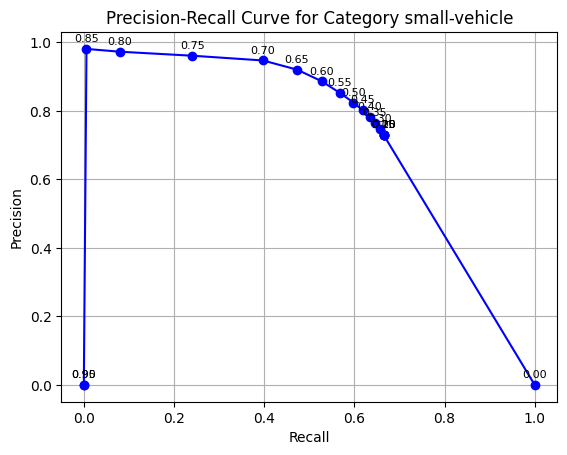

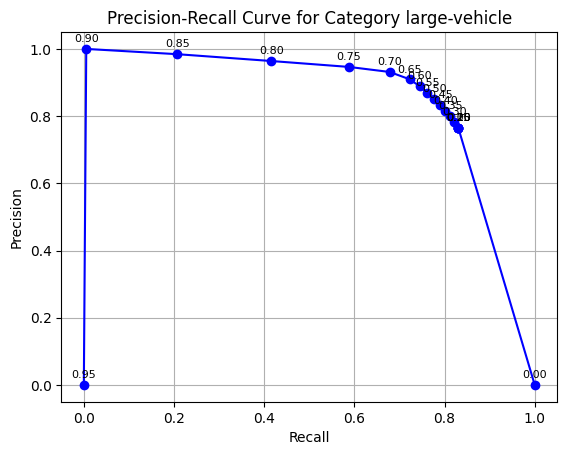

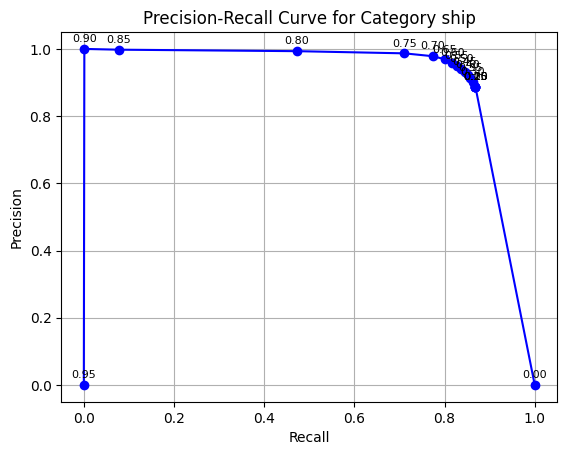

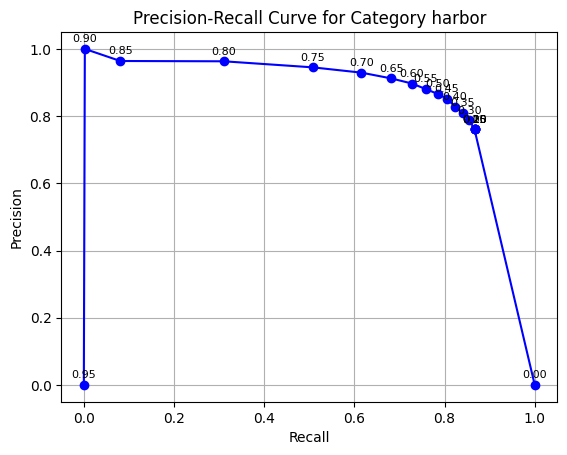

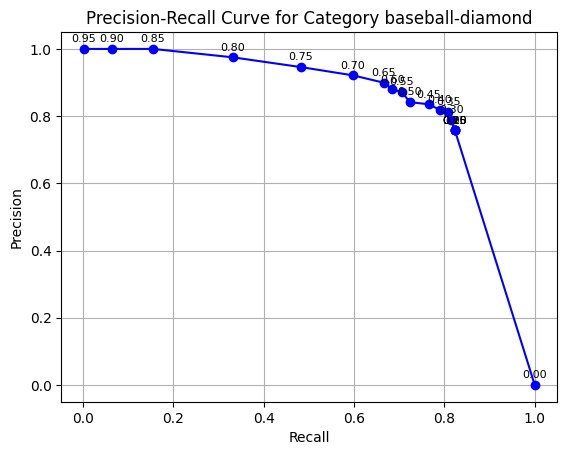

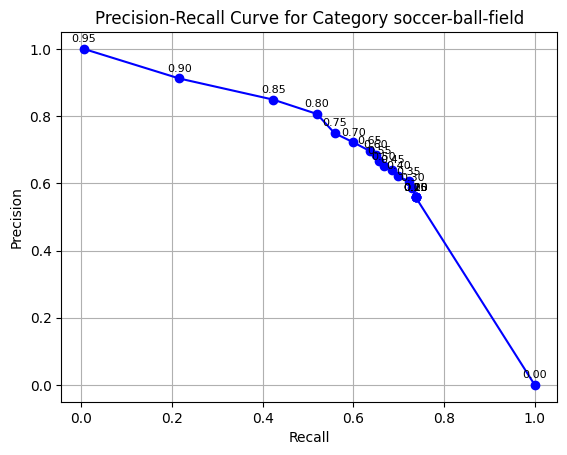

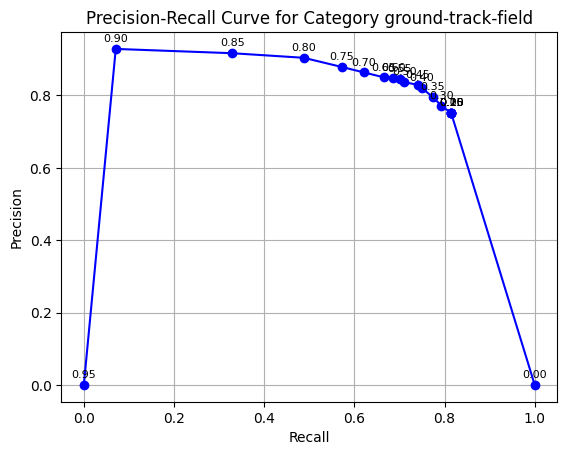

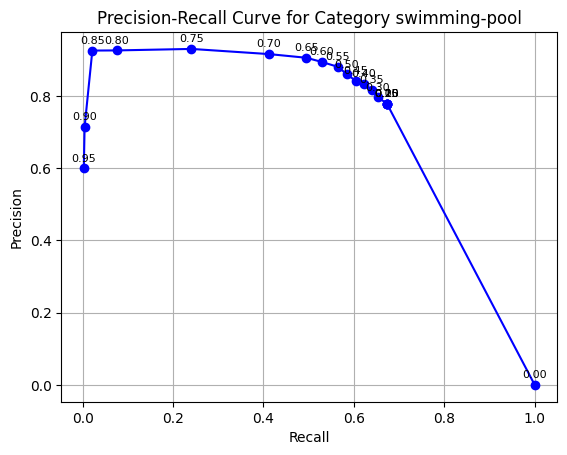

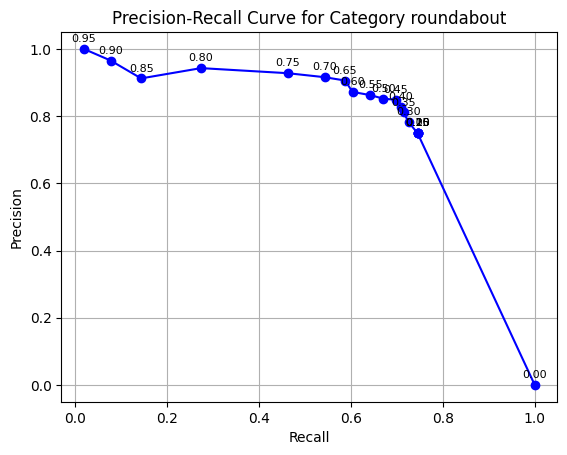

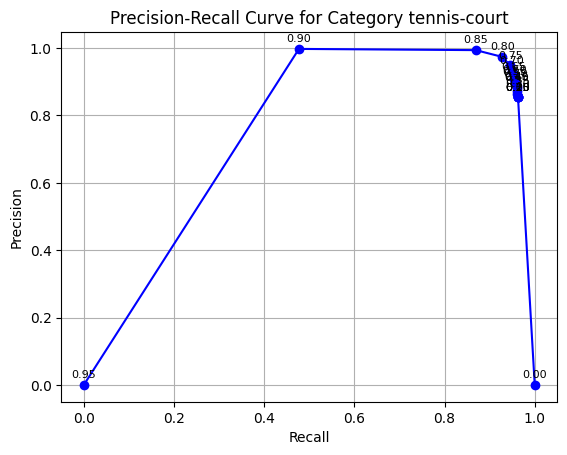

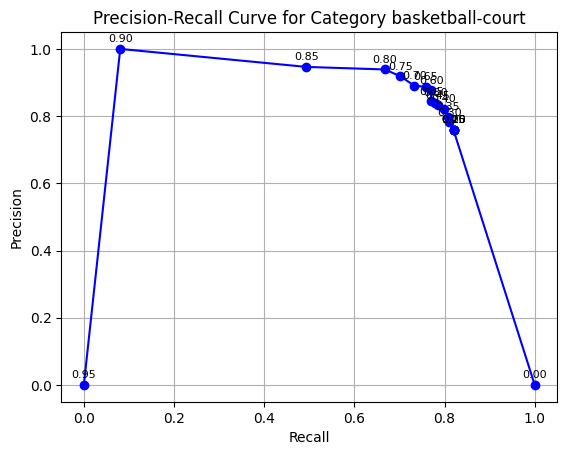

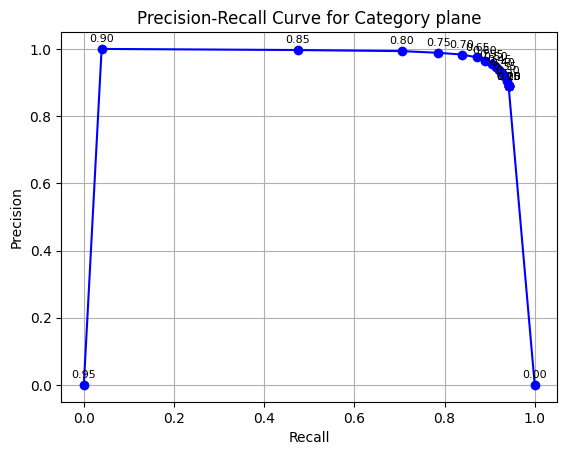

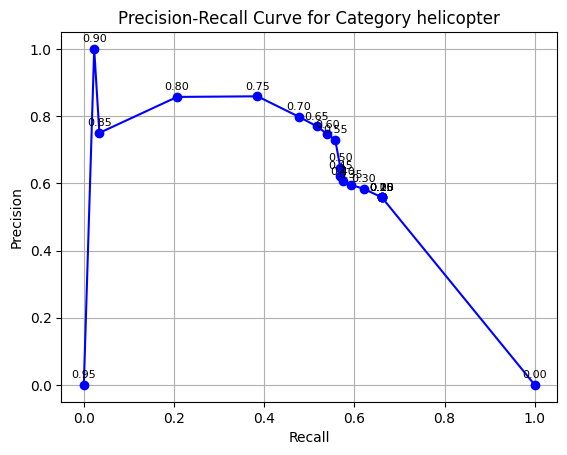

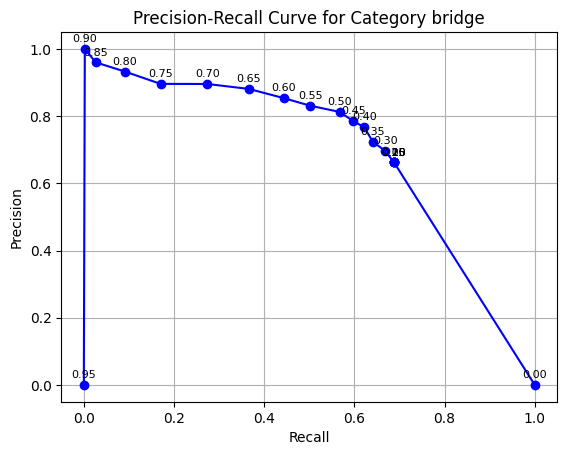

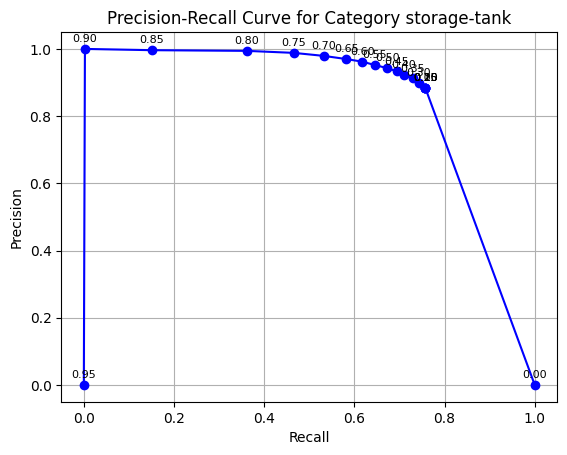

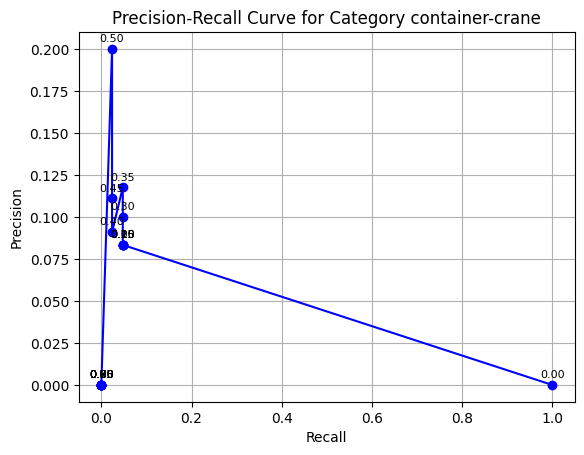

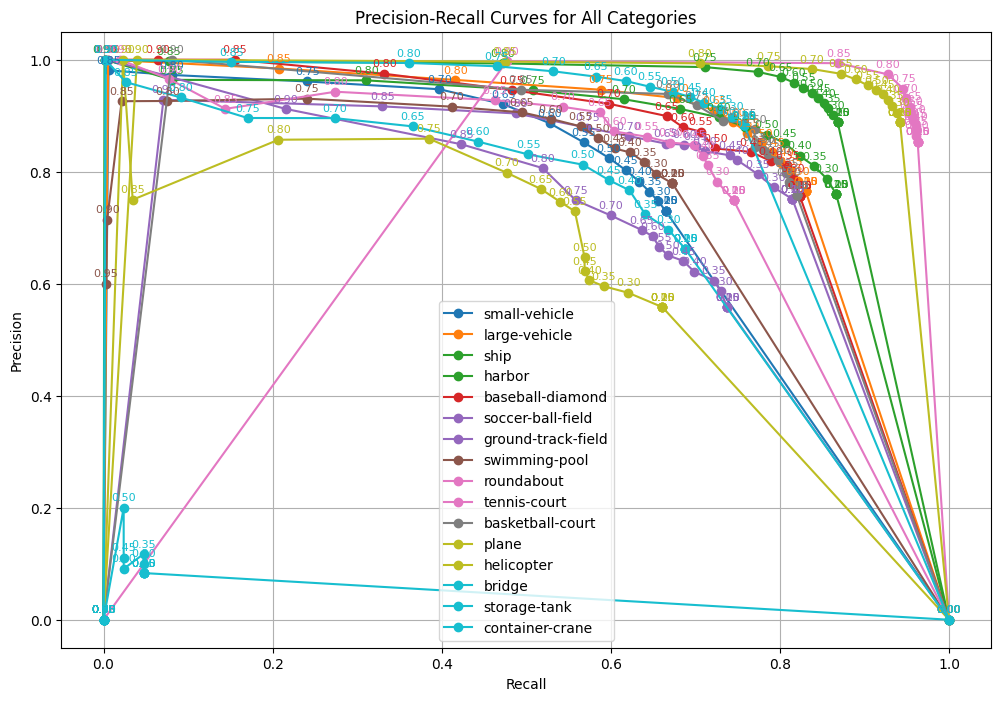

In [63]:
for resFile, out_dir, name in zip(res_file_paths, out_dirs, names):
    cocoDt =cocoGt.loadRes(resFile)
    results = eval_coco(val_coco, resFile, iou_thresh=0.45, conf_thresh=.20)
    for key, val in results.items():
        print(f'{key}:{val}')
    with open(f'{out_dir}/coco_eval_results.json', 'w') as f:
        json.dump(results, f, indent=4)

    # Generate PR curves data over confidence thresholds
    pr_curves = generate_pr_curves_over_conf(val_coco, resFile, 0.45, np.arange(0.00, 1.0, 0.05))
    with open(f'{out_dir}/pr_curve_data.json', 'w') as f:
        json.dump(pr_curves, f, indent=4)

    # Plot PR curves
    plot_pr_curves(pr_curves, category_map,out_dir=out_dir,show=False)
    # Plot PR curves
    plot_all_curves(pr_curves, category_map,out_dir=out_dir,show=False)

    # Initialize COCOeval object
    cocoEval = COCOeval(cocoGt, cocoDt, iouType='bbox')  # iouType can be 'bbox', 'segm', or 'keypoints'

    # Evaluate on all categories and images
    cocoEval.evaluate()
    cocoEval.accumulate()
    cocoEval.summarize()

    # Optional: Access specific evaluation results
    # For example, precision at IoU=0.5, area='all', maxDets=100
    precision = cocoEval.eval['precision']
    # precision has shape [T, R, K, A, M] where
    # T: IoU thresholds, R: recall thresholds, K: number of categories, A: area ranges, M: max detections

    #print("Precision shape:", precision.shape)

    ap_per_class = {}
    for i, cat_id in enumerate(categories):
        # Select precision values for this category (Kth index in the precision array)
        precision = cocoEval.eval['precision'][:, :, i, 0, -1]  # T, R, K, A, M
        
        # Compute AP by averaging precision across IoU thresholds and recall levels
        ap = precision.mean()  # Mean over IoU thresholds and recall levels
        
        cat_name = category_map[i+1]
        ap_per_class[cat_name] = ap
        print(f"Category: {cat_name}, AP: {ap:.4f}")
    with open(f'{out_dir}/coco_eval_by_class.json', 'w') as f:
        json.dump(ap_per_class, f, indent=4)